In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import MNIST dataset

In [2]:
#import the tensorflow dataset
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image=x_train[0]
single_image.shape

(28, 28)

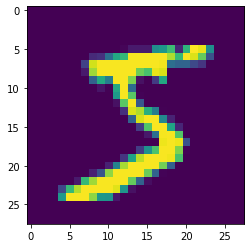

In [6]:
#Shows the image based on the data
plt.imshow(single_image)

In [7]:
y_train[0]

5

# One-hot encoding

In [8]:
#perform one-hot encoding on the y_train and y_test
from tensorflow.keras.utils import to_categorical
y_train.shape

(60000,)

In [9]:
y_cat_train=to_categorical(y_train,num_classes=10)
y_cat_test=to_categorical(y_test,10)

In [10]:
y_cat_train.shape

(60000, 10)

In [11]:
y_cat_test.shape

(10000, 10)

In [12]:
#y_cat_train[0]=5
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
single_image.max()

255

In [14]:
single_image.min()

0

### Normalize the data 

In [15]:
x_train=x_train/255
x_test=x_test/255

In [16]:
scaled_image=x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

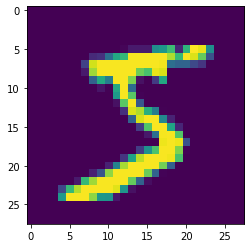

In [17]:
#the image remains the same even after its scaled
plt.imshow(scaled_image)

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [21]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4)
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1457 - accuracy: 0.9568 - val_loss: 0.0525 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0489 - accuracy: 0.9851 - val_loss: 0.0471 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0406 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0393 - val_accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.0390 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0398 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0446 - val_ac

# Evaluate the Model

In [23]:
metrics=pd.DataFrame(model.history.history)

In [24]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.145694,0.956800,0.052508,0.9831
1,0.048945,0.985067,0.047051,0.9853
2,0.031538,0.989800,0.040605,0.9862
3,0.021850,0.993200,0.039282,0.9861
4,0.015189,0.994817,0.038983,0.9878
5,0.010478,0.996550,0.039810,0.9880
6,0.008532,0.997183,0.044551,0.9882
7,0.006345,0.997700,0.050324,0.9867
8,0.005979,0.997817,0.048652,0.9878


<AxesSubplot:>

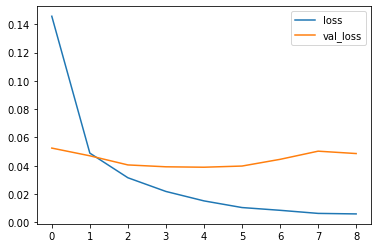

In [25]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

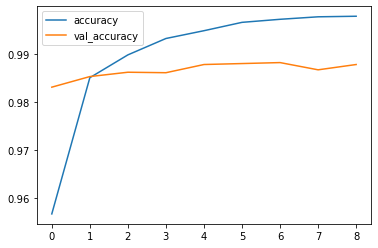

In [26]:
metrics[['accuracy','val_accuracy']].plot()

In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04865247756242752, 0.9878000020980835]

In [31]:
preds_prob=model.predict(x_test)
predictions=np.argmax(preds_prob,axis=1)

# Classification report and confusion matrix

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    0,    0,    0,    1,    0,    0,    2],
       [   0, 1131,    1,    0,    1,    0,    1,    1,    0,    0],
       [   1,    1, 1019,    3,    1,    0,    1,    5,    1,    0],
       [   0,    0,    0, 1005,    0,    2,    0,    0,    2,    1],
       [   1,    0,    0,    0,  977,    0,    2,    0,    0,    2],
       [   1,    0,    0,   10,    0,  877,    2,    0,    2,    0],
       [   4,    2,    0,    0,    2,    1,  949,    0,    0,    0],
       [   1,    1,    7,    0,    0,    0,    0, 1015,    1,    3],
       [   4,    2,    0,    4,    1,    1,    3,    1,  953,    5],
       [   1,    1,    1,    3,   13,    3,    0,    8,    4,  975]],
      dtype=int64)

<AxesSubplot:>

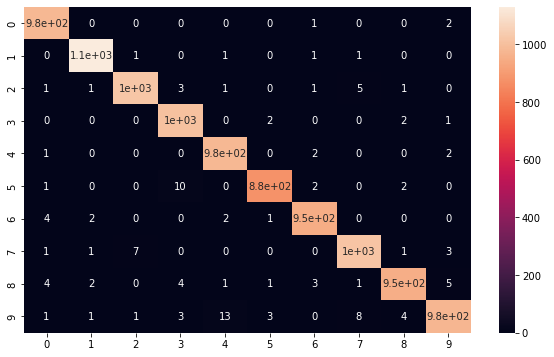

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)